In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

%matplotlib inline

In [3]:
country = range(1,264)
year = range(1977,2016)

In [14]:
df_list = []
frames=pd.read_csv("https://trade.cites.org/cites_trade/exports/download?filters[time_range_start]=1975&filters[time_range_end]=1975&filters[exporters_ids][]=1&filters[importers_ids][]=all_imp&filters[sources_ids][]=all_sou&filters[purposes_ids][]=all_pur&filters[terms_ids][]=all_ter&filters[selection_taxon]=taxon&fil"
)

In [15]:
for j in year:
    for i in country:
        url = "https://trade.cites.org/cites_trade/exports/download?filters[time_range_start]="+str(j)+"&filters[time_range_end]="+str(j)+"&filters[exporters_ids][]="+str(i)+"&filters[importers_ids][]=all_imp&filters[sources_ids][]=all_sou&filters[purposes_ids][]=all_pur&filters[terms_ids][]=all_ter&filters[selection_taxon]=taxon&fil"
        df = pd.read_csv(url)
        df_list.append(df)
    frames=pd.concat(df_list, ignore_index=True)
    frames.to_csv('trade_{}.csv'.format(str(j)))
    frames=pd.read_csv("https://trade.cites.org/cites_trade/exports/download?filters[time_range_start]=1975&filters[time_range_end]=1975&filters[exporters_ids][]=1&filters[importers_ids][]=all_imp&filters[sources_ids][]=all_sou&filters[purposes_ids][]=all_pur&filters[terms_ids][]=all_ter&filters[selection_taxon]=taxon&fil")

In [19]:
df2015 = pd.read_csv('trade_2015.csv')

In [23]:
df2015.count()

Unnamed: 0                    2265215
Year                          2265215
App.                          2265215
Taxon                         2265215
Class                         1443002
Order                         2264430
Family                        2247842
Genus                         2199222
Importer                      2260792
Exporter                      2251978
Origin                         714469
Importer reported quantity    1076428
Exporter reported quantity    1527081
Term                          2265215
Unit                           146836
Purpose                       1965859
Source                        1926994
dtype: int64

In [37]:
df1976=pd.read_csv('trade_1976.csv')

In [25]:
df1976.describe()

,Unnamed: 0,Year,Importer reported quantity,Exporter reported quantity
count,1574.000000,1574.000000,798.000000,778.000000
mean,786.500000,1975.909784,949.689223,567.883033
std,454.518977,0.286582,9993.651368,3094.829157
min,0.000000,1975.000000,1.000000,1.000000
25%,393.250000,1976.000000,NaN,NaN
50%,786.500000,1976.000000,NaN,NaN
75%,1179.750000,1976.000000,NaN,NaN
max,1573.000000,1976.000000,263412.000000,42383.000000


In [38]:
df_new = pd.concat([df1976, df2015])

In [39]:
df_new.describe()

,Unnamed: 0,Year,Importer reported quantity,Exporter reported quantity
count,2.266789e+06,2.266789e+06,1.077226e+06,1.527859e+06
mean,1.131821e+06,2.000674e+03,1.124867e+04,3.263240e+03
std,6.543639e+05,9.760656e+00,2.124474e+06,2.130457e+05
min,0.000000e+00,1.975000e+03,0.000000e+00,0.000000e+00
25%,5.651230e+05,1.993000e+03,NaN,NaN
50%,1.131820e+06,2.002000e+03,NaN,NaN
75%,1.698517e+06,2.009000e+03,NaN,NaN
max,2.265214e+06,2.015000e+03,1.200000e+09,1.089340e+08


In [3]:
df_new.to_csv('trade_complete.csv')

NameError: name 'df_new' is not defined

In [4]:
df_new = pd.read_csv('trade_complete.csv')

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266789 entries, 0 to 2266788
Data columns (total 18 columns):
Unnamed: 0                    int64
Unnamed: 0.1                  int64
Year                          float64
App.                          object
Taxon                         object
Class                         object
Order                         object
Family                        object
Genus                         object
Importer                      object
Exporter                      object
Origin                        object
Importer reported quantity    float64
Exporter reported quantity    float64
Term                          object
Unit                          object
Purpose                       object
Source                        object
dtypes: float64(3), int64(2), object(13)
memory usage: 311.3+ MB


In [42]:
df_new.head()

,Unnamed: 0,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,0,1975.0,II,Testudo hermanni,Reptilia,Testudines,Testudinidae,Testudo,CH,YU,NaN,600.0,NaN,live,NaN,T,NaN
1,1,1975.0,I,Alligator mississippiensis,Reptilia,Crocodylia,Alligatoridae,Alligator,CH,DE,NaN,16.0,NaN,skins,NaN,NaN,NaN
2,2,1975.0,I,Crocodylus niloticus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,CH,DE,NaN,12.0,NaN,skins,NaN,NaN,NaN
3,3,1975.0,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CH,DE,NaN,1.0,NaN,live,NaN,Q,NaN
4,4,1975.0,I,Panthera pardus,Mammalia,Carnivora,Felidae,Panthera,CA,DE,NaN,3.0,NaN,live,NaN,Z,NaN


In [52]:
print np.sort(df_new['Importer'].unique())

[nan 'AD' 'AE' 'AF' 'AG' 'AI' 'AL' 'AM' 'AN' 'AO' 'AQ' 'AR' 'AS' 'AT' 'AU'
 'AW' 'AZ' 'BA' 'BB' 'BD' 'BE' 'BF' 'BG' 'BH' 'BI' 'BJ' 'BL' 'BM' 'BN' 'BO'
 'BQ' 'BR' 'BS' 'BT' 'BV' 'BW' 'BY' 'BZ' 'CA' 'CC' 'CD' 'CF' 'CG' 'CH' 'CI'
 'CK' 'CL' 'CM' 'CN' 'CO' 'CP' 'CR' 'CS' 'CU' 'CV' 'CW' 'CX' 'CY' 'CZ' 'DD'
 'DE' 'DJ' 'DK' 'DM' 'DO' 'DZ' 'EC' 'EE' 'EG' 'EH' 'ER' 'ES' 'ET' 'FI' 'FJ'
 'FK' 'FM' 'FO' 'FR' 'GA' 'GB' 'GD' 'GE' 'GF' 'GG' 'GH' 'GI' 'GL' 'GM' 'GN'
 'GP' 'GQ' 'GR' 'GT' 'GU' 'GW' 'GY' 'HK' 'HM' 'HN' 'HR' 'HT' 'HU' 'ID' 'IE'
 'IL' 'IM' 'IN' 'IO' 'IQ' 'IR' 'IS' 'IT' 'JE' 'JM' 'JO' 'JP' 'KE' 'KG' 'KH'
 'KI' 'KM' 'KN' 'KP' 'KR' 'KV' 'KW' 'KY' 'KZ' 'LA' 'LB' 'LC' 'LI' 'LK' 'LR'
 'LS' 'LT' 'LU' 'LV' 'LY' 'MA' 'MC' 'MD' 'ME' 'MF' 'MG' 'MH' 'MK' 'ML' 'MM'
 'MN' 'MO' 'MP' 'MQ' 'MR' 'MS' 'MT' 'MU' 'MV' 'MW' 'MX' 'MY' 'MZ' 'NC' 'NE'
 'NF' 'NG' 'NI' 'NL' 'NO' 'NP' 'NR' 'NT' 'NU' 'NZ' 'OM' 'PA' 'PC' 'PE' 'PF'
 'PG' 'PH' 'PK' 'PL' 'PM' 'PN' 'PR' 'PS' 'PT' 'PW' 'PY' 'QA' 'RE' 'RO' 'RS'
 'RU' 'RW' 'S

In [57]:
df_new.loc[df_new['Importer'] == 'XX']

,Unnamed: 0,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
91,91,1975.0,I,Caloenas nicobarica,Aves,Columbiformes,Columbidae,Caloenas,XX,CH,NaN,NaN,1.0,live,NaN,NaN,C
92,92,1975.0,I,Crocodylus cataphractus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,XX,CH,NaN,NaN,45.0,skins,NaN,NaN,NaN
93,93,1975.0,I,Crocodylus niloticus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,XX,CH,NaN,NaN,121.0,skins,NaN,NaN,NaN
94,94,1975.0,I,Tomistoma schlegelii,Reptilia,Crocodylia,Crocodylidae,Tomistoma,XX,CH,NaN,NaN,1.0,live,NaN,NaN,NaN
95,95,1975.0,I,Panthera pardus,Mammalia,Carnivora,Felidae,Panthera,XX,CH,NaN,NaN,1.0,live,NaN,NaN,C
96,96,1975.0,I,Panthera pardus,Mammalia,Carnivora,Felidae,Panthera,XX,CH,NaN,NaN,5.0,skins,NaN,NaN,NaN
97,97,1975.0,I,Varecia variegata,Mammalia,Primates,Lemuridae,Varecia,XX,CH,NaN,NaN,2.0,live,NaN,NaN,C
98,98,1975.0,I,Python molurus molurus,Reptilia,Serpentes,Pythonidae,Python,XX,CH,NaN,NaN,25.0,skins,NaN,NaN,NaN
99,99,1975.0,I,Leucopsar rothschildi,Aves,Passeriformes,Sturnidae,Leucopsar,XX,CH,NaN,NaN,2.0,live,NaN,NaN,C
100,100,1975.0,I,Varanus bengalensis,Reptilia,Sauria,Varanidae,Varanus,XX,CH,NaN,NaN,145.0,skins,NaN,NaN,NaN


In [70]:
df_new.loc[df_new['Exporter'] == 'XX']

,Unnamed: 0,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source


In [61]:
df_new[df_new['Importer'].isnull()]

,Unnamed: 0,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
5665,5665,1978.0,II,Orchidaceae spp.,NaN,Orchidales,Orchidaceae,NaN,NaN,SC,NaN,NaN,1.0000,live,NaN,NaN,NaN
7187,7187,1978.0,II,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,NaN,BW,NaN,NaN,4.0000,leather items,NaN,NaN,NaN
7188,7188,1978.0,II,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,NaN,BW,NaN,NaN,2.0000,tusks,NaN,NaN,NaN
22114,22114,1980.0,II,Arctocephalus pusillus,Mammalia,Carnivora,Otariidae,Arctocephalus,NaN,DE,NaN,NaN,104.0000,skins,NaN,NaN,NaN
25608,25608,1980.0,II,Pachypodium brevicaule,NaN,Gentianales,Apocynaceae,Pachypodium,NaN,US,NaN,NaN,1.0000,live,NaN,T,NaN
25609,25609,1980.0,II,Pachypodium horombense,NaN,Gentianales,Apocynaceae,Pachypodium,NaN,US,NaN,NaN,1.0000,live,NaN,T,NaN
25810,25810,1980.0,II,Ariocarpus agavoides,NaN,Caryophyllales,Cactaceae,Ariocarpus,NaN,US,NaN,NaN,4.0000,live,NaN,T,NaN
25817,25817,1980.0,II,Ariocarpus scaphirostris,NaN,Caryophyllales,Cactaceae,Ariocarpus,NaN,US,NaN,NaN,3.0000,live,NaN,T,NaN
25827,25827,1980.0,II,Arthrocereus spp.,NaN,Caryophyllales,Cactaceae,Arthrocereus,NaN,US,NaN,NaN,2.0000,live,NaN,T,NaN
26031,26031,1980.0,II,Echinocereus viridiflorus,NaN,Caryophyllales,Cactaceae,Echinocereus,NaN,US,NaN,NaN,3.0000,live,NaN,T,NaN


In [69]:
df_new[df_new['Exporter'].isnull()]

,Unnamed: 0,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
1088,1088,1976.0,I,Acinonyx jubatus,Mammalia,Carnivora,Felidae,Acinonyx,DE,NaN,NaN,4.0,NaN,live,NaN,Z,NaN
1089,1089,1976.0,II,Varanus exanthematicus,Reptilia,Sauria,Varanidae,Varanus,CH,NaN,NaN,1.0,NaN,live,NaN,T,NaN
2504,2504,1977.0,I,Crocodylus niloticus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,DE,NaN,NaN,2.0,NaN,trophies,NaN,P,NaN
2505,2505,1977.0,I,Acinonyx jubatus,Mammalia,Carnivora,Felidae,Acinonyx,DE,NaN,NaN,18.0,NaN,live,NaN,Z,NaN
2506,2506,1977.0,I,Acinonyx jubatus,Mammalia,Carnivora,Felidae,Acinonyx,DE,NaN,NaN,1.0,NaN,live,NaN,NaN,NaN
2507,2507,1977.0,I,Panthera pardus,Mammalia,Carnivora,Felidae,Panthera,DE,NaN,NaN,2.0,NaN,trophies,NaN,P,NaN
2508,2508,1977.0,II,Loxodonta africana,Mammalia,Proboscidea,Elephantidae,Loxodonta,DE,NaN,NaN,4.0,NaN,live,NaN,NaN,NaN
2509,2509,1977.0,II,Falco tinnunculus,Aves,Falconiformes,Falconidae,Falco,CH,NaN,NaN,2.0,NaN,live,NaN,P,NaN
2510,2510,1977.0,II,Caracal caracal,Mammalia,Carnivora,Felidae,Caracal,GB,NaN,ZA,2.0,NaN,live,NaN,NaN,NaN
2511,2511,1977.0,II,Stigmochelys pardalis,Reptilia,Testudines,Testudinidae,Stigmochelys,CH,NaN,NaN,19.0,NaN,live,NaN,T,NaN


In [144]:
df_year = df_new.groupby(['Year']).count()
df_year = df_year[[0]]
df_year['Year'] = df_year.index
df_year = pd.DataFrame(df_year.values)
df_year.columns = ['trade_vol','Year']

In [68]:
df_year

,trade_vol,Year
0,142.0,1975.0
1,1432.0,1976.0
2,3915.0,1977.0
3,6279.0,1978.0
4,10722.0,1979.0
5,15617.0,1980.0
6,23518.0,1981.0
7,25459.0,1982.0
8,29416.0,1983.0
9,33092.0,1984.0


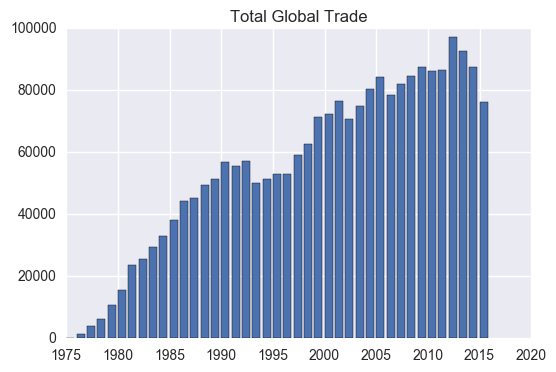

In [146]:
sns.plt.bar(df_year['Year'], df_year['trade_vol'])
sns.plt.title('Total Global Trade', fontsize=12)
plt.savefig('Global_trade_by_year.png', dpi=1000)
# World total volumn of trade by year. Increase over time. The recent drop 2014-2015 in
# trade is probably caused by lag of data input. According to CITES, some countries and
# regions delay reporting for up to 2/3 years.
# The dip starting in 1993 may caused by the recession of the early 1990s, but the recent 
# financial crisis in 2008 does not have a major impact.

In [147]:
df_country = df_new.groupby(['Importer']).count()

In [148]:
df_country10 = df_country.sort(['Year'], ascending = False).head(10)
df_country10 = df_country10[[0]]
df_country10['Importer'] = df_country10.index
df_country10 = pd.DataFrame(df_country10.values)
df_country10.columns = ['trade_vol','Importer']

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [20]:
df_country10

,trade_vol,Importer
0,438103,US
1,181690,JP
2,163860,DE
3,122961,CH
4,97827,GB
5,91913,CA
6,82887,FR
7,54115,IT
8,46725,NL
9,44161,AU


In [149]:
df_country20 = df_country.sort(['Year'], ascending = False).head(20)
df_country20 = df_country20[[0]]
df_country20['Importer'] = df_country20.index
df_country20 = pd.DataFrame(df_country20.values)
df_country20.columns = ['trade_vol','Importer']

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [22]:
df_country20

,trade_vol,Importer
0,438103,US
1,181690,JP
2,163860,DE
3,122961,CH
4,97827,GB
5,91913,CA
6,82887,FR
7,54115,IT
8,46725,NL
9,44161,AU


In [150]:
df_reduced = df_new[['Year','Importer','Unnamed: 0']]
df_reduced = df_reduced.dropna()
df_reduced = df_reduced[df_reduced['Importer'].isin(['US', 'JP', 'DE', 'CH', 'GB', 'CA', 'FR', 'IT', 'NL', 'AU'])]

In [151]:
df_reduced = df_reduced.rename(index=str, columns={"Unnamed: 0": "Vol"})

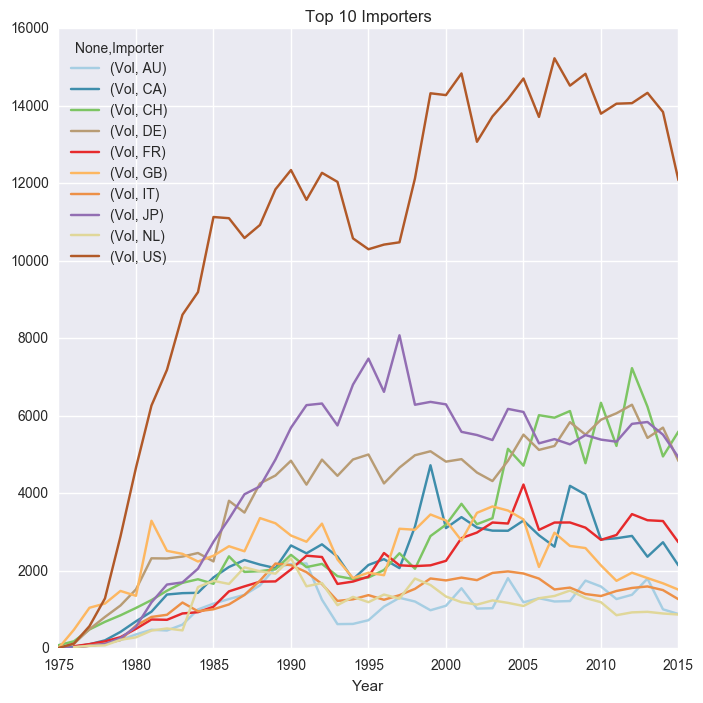

In [152]:
df_reduced_groupby = df_reduced.groupby(['Year', 'Importer']).count()
df_reduced_groupby.unstack().plot(figsize = (8,8), colormap =plt.get_cmap('Paired'))
sns.plt.title('Top 10 Importers', fontsize=12)
plt.savefig('Top_10_Imp.png', dpi=1000)
# TOP 10 countries of most trade based on historical record. US has way more higher trade
# volumn than any of other country. All Top 10 except of Japan are western countries.
# This can be due to data avaliablity and more developed economy.

In [153]:
df_reduced20 = df_new[['Year','Importer','Unnamed: 0']]
df_reduced20 = df_reduced20.dropna()
df_reduced20 = df_reduced20[df_reduced20['Importer'].isin(['US', 'JP', 'DE', 'CH', 'GB', 'CA',\
                                                           'FR', 'IT', 'NL', 'AU', 'ES', 'ZA',\
                                                           'HK', 'SG', 'CN', 'TW', 'KR', 'AT',\
                                                           'DK','BE'])]

In [154]:
df_reduced20 = df_reduced20.rename(index=str, columns={"Unnamed: 0": "Vol"})

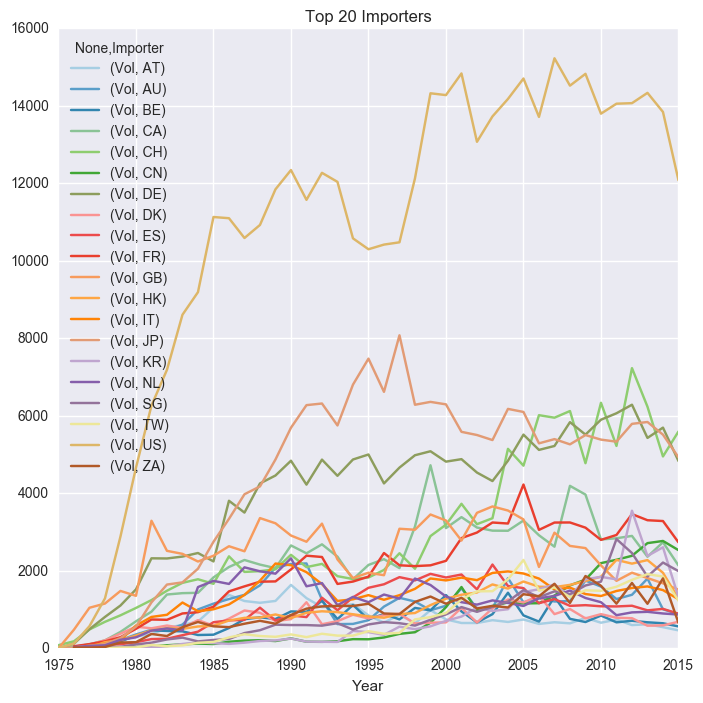

In [156]:
df_reduced20_groupby = df_reduced20.groupby(['Year', 'Importer']).count()
df_reduced20_groupby.unstack().plot(figsize = (8,8), colormap =plt.get_cmap('Paired'))
sns.plt.title('Top 20 Importers', fontsize=12)
plt.savefig('Top_20_Imp.png', dpi=1000)
# TOP 20 countries of most trade based on historical record.
# We see more East Asian countries and emerging markets.

In [5]:
df_region = df_new[['Year','Importer','Unnamed: 0']]
df_region = df_region.dropna()

In [6]:
EastAsia = ['CN', 'JP', 'KR', 'KP', 'TW', 'MN', 'HK', 'MO']
US_Canada = ['US','CA']
Europe = ['DD','DE','IT','FR','GB','CH','PL','NL','UA','GR','AT','SE','NO',\
          'MT','CZ','BE','IS','FI','HR','CY','RO','HU','DK','BG','LU','MC',\
          'SI','RS','AL','LT','BY','ME','EE','MD','SK','BA','LV','IE','SM',\
          'MK','LI','AD','GI','FO','IM','JE','SJ','AX']
d1 = dict([(x, 'US/Canada') for x in US_Canada])
d2 = dict([(x, 'East Asia') for x in EastAsia])
d3 = dict([(x, 'Europe') for x in Europe])
d1.update(d2)
d1.update(d3)
print d1, len(d1), len(EastAsia)+len(US_Canada)+len(Europe)

{'BE': 'Europe', 'FR': 'Europe', 'BG': 'Europe', 'DK': 'Europe', 'HR': 'Europe', 'DD': 'Europe', 'DE': 'Europe', 'JP': 'East Asia', 'HU': 'Europe', 'HK': 'East Asia', 'MK': 'Europe', 'FI': 'Europe', 'JE': 'Europe', 'BY': 'Europe', 'GR': 'Europe', 'FO': 'Europe', 'NL': 'Europe', 'SJ': 'Europe', 'TW': 'East Asia', 'BA': 'Europe', 'LI': 'Europe', 'LV': 'Europe', 'LT': 'Europe', 'LU': 'Europe', 'MT': 'Europe', 'RO': 'Europe', 'IS': 'Europe', 'PL': 'Europe', 'CH': 'Europe', 'CN': 'East Asia', 'EE': 'Europe', 'CA': 'US/Canada', 'IT': 'Europe', 'AL': 'Europe', 'CZ': 'Europe', 'CY': 'Europe', 'IM': 'Europe', 'GB': 'Europe', 'NO': 'Europe', 'AD': 'Europe', 'IE': 'Europe', 'GI': 'Europe', 'ME': 'Europe', 'MD': 'Europe', 'MC': 'Europe', 'AX': 'Europe', 'RS': 'Europe', 'MO': 'East Asia', 'MN': 'East Asia', 'US': 'US/Canada', 'SK': 'Europe', 'KR': 'East Asia', 'SI': 'Europe', 'KP': 'East Asia', 'SM': 'Europe', 'UA': 'Europe', 'SE': 'Europe', 'AT': 'Europe'} 58 58


In [7]:
df_region['Importer_Group'] = df_region['Importer'].map(d1)

In [10]:
df_region=df_region.rename(index=str, columns={"Unnamed: 0": "Vol"})

In [11]:
df_region = df_region.fillna('Rest of World')
df_region.loc[df_region['Vol'] >= 0, 'Vol'] = 1

In [12]:
df_region = df_region.rename(index=str, columns={"Unnamed: 0": "Vol"})
df_region = df_region.drop('Importer',1)

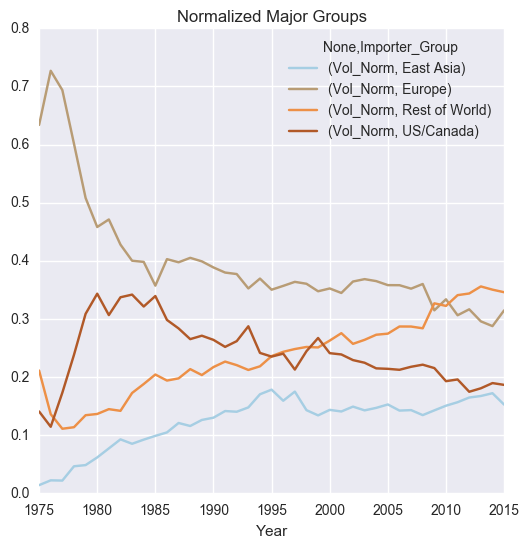

In [14]:
norm = df_region.groupby(['Year']).transform(lambda x: (x/x.sum()))
norm = norm.rename(index=str, columns={"Vol": "Vol_Norm"})
df_region_norm = pd.concat([df_region, norm], axis=1)
df_region_norm = df_region_norm.drop('Vol',1)
df_norm_groupby = df_region_norm.groupby(['Year', 'Importer_Group']).sum()
df_norm_groupby.unstack().plot(figsize = (6,6), colormap =plt.get_cmap('Paired'))
sns.plt.title('Normalized Major Groups', fontsize=12)
plt.savefig('Norm_Major_Groups.png', dpi=500)

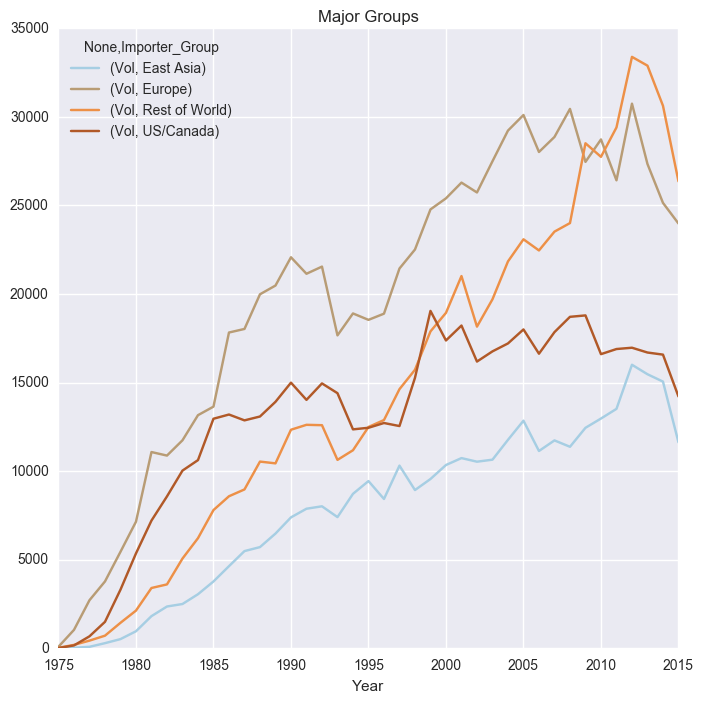

In [174]:
df_region_groupby = df_region.groupby(['Year', 'Importer_Group']).sum()
df_region_groupby.unstack().plot(figsize = (8,8), colormap =plt.get_cmap('Paired'))
sns.plt.title('Major Groups', fontsize=12)
# plt.savefig('Major_Groups.png', dpi=1000)
# EU and North American trade is generally stable after 2003, yet East Asia and rest of world
# is undergoing a substential increase in animal trade. Which suggest globalization and degree 
# of separation should fall. The recent drop 2014-2015 in trade is probably caused by lag of 
# data input. According to CITES, some countries and regions delay reporting for up to 2/3 years. 

In [164]:
df_source = df_new[['Year','Source','Unnamed: 0']]

In [166]:
df_source = df_source.fillna('U')
df_source = df_source.rename(index=str, columns={"Unnamed: 0": "Vol"})
df_source = df_source.loc[df_source['Year'] >= 1995]
df_source

,Year,Source,Vol
649600,1995.0,U,648026
649601,1995.0,U,648027
649602,1995.0,I,648028
649603,1995.0,U,648029
649604,1995.0,U,648030
649605,1995.0,U,648031
649606,1995.0,W,648032
649607,1995.0,U,648033
649608,1995.0,U,648034
649609,1995.0,U,648035


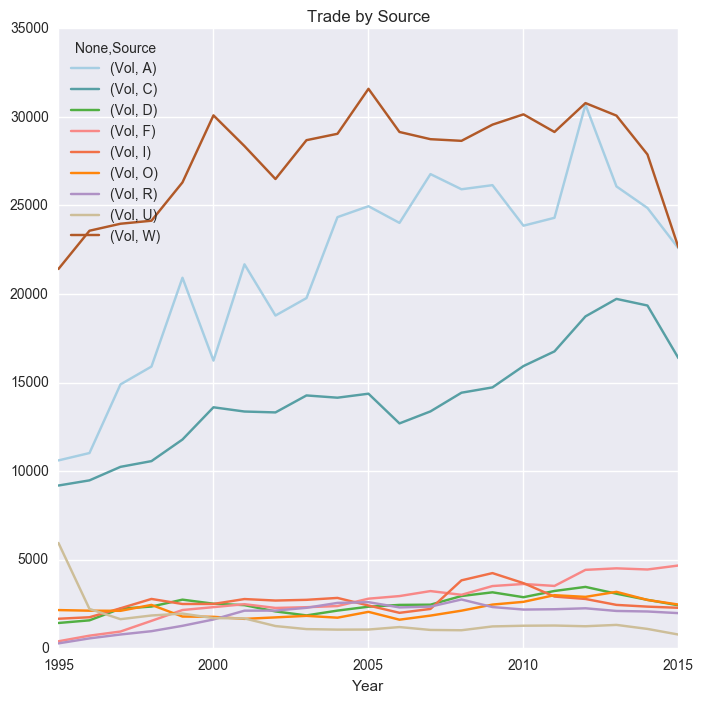

In [167]:
df_source_groupby = df_source.groupby(['Year', 'Source']).count()
df_source_groupby.unstack().plot(figsize = (8,8), colormap =plt.get_cmap('Paired'))
sns.plt.title('Trade by Source', fontsize=12)
plt.savefig('Source.png', dpi=1000)

In [ ]:
df_source = df_source.loc[df_source['Year'] >= 1995 and ]

In [199]:
# normalized trade by region
# region by animal class

In [218]:
d2 = {'Aves':'Birds', 'Mammalia':'Mammals', 'Reptilia':'Reptiles', 'Amphibia':'Fish, Amphibians',\
      'Anthozoa':'Coral', 'Hydrozoa':'Insects, Spiders, Jellyfish, Shellfish', 'Insecta':'Insects, Spiders, Jellyfish, Shellfish',\
      'Arachnida':'Insects, Spiders, Jellyfish, Shellfish', 'Hirudinoidea':'Insects, Spiders, Jellyfish, Shellfish',\
      'Bivalvia':'Insects, Spiders, Jellyfish, Shellfish', 'Actinopteri':'Fish, Amphibians',\
      'Dipneusti':'Fish, Amphibians', 'Coelacanthi':'Fish, Amphibians', 'Gastropoda':'Insects, Spiders, Jellyfish, Shellfish',\
      'Actinopterygii':'Fish, Amphibians', 'Elasmobranchii':'Fish, Amphibians', 'Holothuroidea':'Insects, Spiders, Jellyfish, Shellfish'}

In [219]:
df_class = df_new[['Year','Importer','Class','Source']]
df_class = df_class.dropna()
df_class = df_class.loc[df_class['Source'] == 'W']
df_class['Importer_Group'] = df_class['Importer'].map(d1)
df_class['Class_Group'] = df_class['Class'].map(d2)

In [220]:
df_class = df_class.drop(['Importer','Source','Class'],1)

In [222]:
df_class.Class_Group.unique()

array(['Birds', 'Mammals', 'Reptiles', 'Fish, Amphibians', 'Coral',
       'Insects, Spiders, Jellyfish, Shellfish'], dtype=object)

In [225]:
df_class = df_class.loc[df_class['Year'] >= 1990]

In [226]:
df_list = []
group = ['US/Canada', 'East Asia', 'Europe', 'Rest of World']
for i in group:
    df_list.append(df_class.loc[df_class['Importer_Group'] == i])

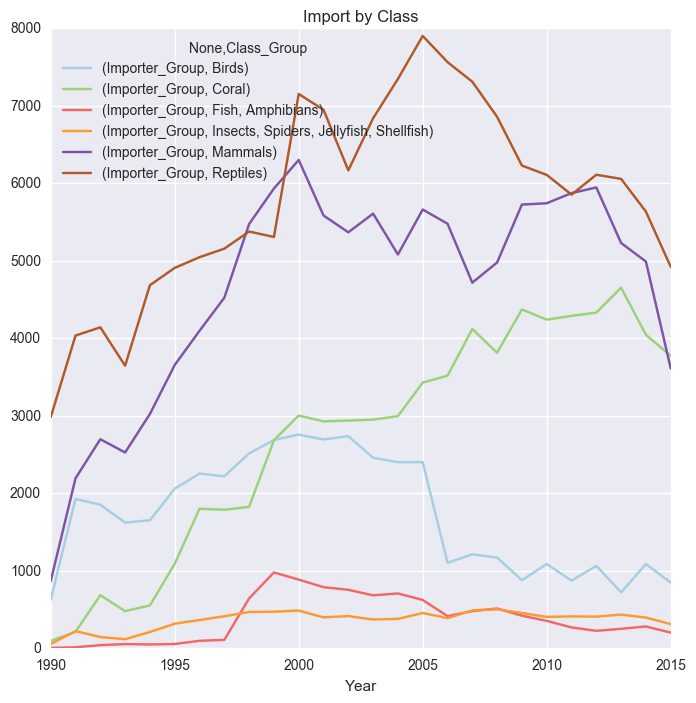

In [227]:
df_class_groupby = df_class.groupby(['Year', 'Class_Group']).count()
df_class_groupby.unstack().plot(figsize = (8,8), colormap =plt.get_cmap('Paired'))
sns.plt.title('Import by Class', fontsize=12)
plt.savefig('Import_by_Class.png', dpi=1000)

In [232]:
df_class_groupby2 = df_class.groupby(['Year', 'Class_Group'],as_index=False).count()
df_class_groupby2

,Year,Class_Group,Importer_Group
0,1990.0,Birds,626
1,1990.0,Coral,96
2,1990.0,"Fish, Amphibians",6
3,1990.0,"Insects, Spiders, Jellyfish, Shellfish",55
4,1990.0,Mammals,868
5,1990.0,Reptiles,2983
6,1991.0,Birds,1928
7,1991.0,Coral,213
8,1991.0,"Fish, Amphibians",14
9,1991.0,"Insects, Spiders, Jellyfish, Shellfish",222


In [15]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,0,0,1975.0,II,Testudo hermanni,Reptilia,Testudines,Testudinidae,Testudo,CH,YU,NaN,600.0,NaN,live,NaN,T,NaN
1,1,1,1975.0,I,Alligator mississippiensis,Reptilia,Crocodylia,Alligatoridae,Alligator,CH,DE,NaN,16.0,NaN,skins,NaN,NaN,NaN
2,2,2,1975.0,I,Crocodylus niloticus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,CH,DE,NaN,12.0,NaN,skins,NaN,NaN,NaN
3,3,3,1975.0,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CH,DE,NaN,1.0,NaN,live,NaN,Q,NaN
4,4,4,1975.0,I,Panthera pardus,Mammalia,Carnivora,Felidae,Panthera,CA,DE,NaN,3.0,NaN,live,NaN,Z,NaN


In [16]:
df_bird = df_new[df_new['Class']=='Aves']
df_bird.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284505 entries, 9 to 2266752
Data columns (total 18 columns):
Unnamed: 0                    284505 non-null int64
Unnamed: 0.1                  284505 non-null int64
Year                          284505 non-null float64
App.                          284505 non-null object
Taxon                         284505 non-null object
Class                         284505 non-null object
Order                         284500 non-null object
Family                        283755 non-null object
Genus                         282606 non-null object
Importer                      282315 non-null object
Exporter                      283413 non-null object
Origin                        70510 non-null object
Importer reported quantity    138961 non-null float64
Exporter reported quantity    195828 non-null float64
Term                          284505 non-null object
Unit                          2212 non-null object
Purpose                       251640 non-n

In [17]:
df_bird = df_bird[['Year','Taxon','Importer','Exporter','Importer reported quantity','Exporter reported quantity',\
                   'Term','Unit','Purpose','Source']]

In [25]:
df_bird_source = df_bird.groupby(['Source','Year'], as_index = False).count()

In [26]:
df_bird_source[df_bird_source['Source']=='C']

,Source,Year,Taxon,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose
2,C,1975.0,8,8,8,6,2,8,0,6
3,C,1976.0,28,28,28,17,11,28,0,14
4,C,1977.0,41,41,41,16,25,41,0,14
5,C,1978.0,63,63,63,20,43,63,0,14
6,C,1979.0,54,54,54,26,28,54,0,32
7,C,1980.0,88,88,88,30,62,88,0,56
8,C,1981.0,214,214,214,111,108,214,0,184
9,C,1982.0,285,285,285,128,161,285,0,226
10,C,1983.0,479,479,479,212,273,479,0,276
11,C,1984.0,1328,1323,1328,308,1054,1328,0,512


In [34]:
df_bird_country = df_bird.groupby(['Exporter'], as_index = False).count()
df_bird_country.sort('Year')

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Exporter,Year,Taxon,Importer,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,AD,1,1,1,1,0,1,0,0,1
155,NR,1,1,1,1,0,1,0,0,0
166,PM,1,1,1,0,1,1,0,1,1
48,CX,1,1,1,1,0,1,0,1,0
215,VA,1,1,1,1,0,1,0,1,1
23,BL,1,1,1,1,0,1,0,1,1
67,FM,1,1,1,1,0,1,0,1,1
222,WS,1,1,1,1,0,1,0,1,1
223,YD,1,1,1,1,0,1,0,0,1
39,CK,1,1,1,1,0,1,0,1,1


In [ ]:
"find a specific country exports a specific wild aves taxon to Europe. After 2005, the country\
should see a dip in trade, if the trade recovers, then the ban is not efficient and the economy\
adapt the change easily. If the trade remain low, the ban is efficient, the economy is sensitive\
to trade partner change"

In [35]:
df_bird_wild = df_bird[df_bird['Source']=='W']

In [39]:
df_bird_wild.groupby(['Taxon']).count().sort('Year')

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Year,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
Taxon,,,,,,,,,
Heliomaster squamosus,1,1,1,1,0,1,0,1,1
Ptiloris paradiseus,1,1,1,0,1,1,0,1,1
Ptiloris intercedens,1,1,1,0,1,1,0,1,1
Metallura baroni,1,1,1,0,1,1,0,1,1
Circaetus spp.,1,1,1,0,1,1,0,1,1
Metallura iracunda,1,1,1,1,0,1,0,0,1
Psittaculirostris spp.,1,1,1,1,0,1,0,1,1
Ciconia stormi,1,1,1,0,1,1,0,1,1
Psittacidae hybrid,1,1,1,1,0,1,0,1,1


In [40]:
df_greyparrot = df_bird_wild[df_bird_wild['Taxon']=='Psittacus erithacus']

In [69]:
df_greyparrot.loc[df_greyparrot['Exporter reported quantity'].isnull(),\
                  'Exporter reported quantity'] = df_greyparrot['Importer reported quantity']

KeyError: 'Importer reported quantity'

In [73]:
df_greyparrot1 = pd.read_csv('greyparrot.csv')

In [86]:
df_greyparrot1.groupby('Exporter').sum().sort('Exporter reported quantity')

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Unnamed: 0,Year,Importer reported quantity,Exporter reported quantity
Exporter,,,,
DO,765585,1997.0,NaN,1.0
KG,1226012,2003.0,1.0,1.0
HT,702790,1996.0,1.0,1.0
NP,1987133,2012.0,1.0,1.0
PE,539590,1992.0,NaN,1.0
PG,712269,1996.0,1.0,1.0
EC,513971,1992.0,NaN,1.0
LU,1107484,2002.0,1.0,1.0
PR,438372,1991.0,1.0,1.0


In [75]:
df_CM = df_greyparrot1[df_greyparrot1['Exporter']=='CM']

In [76]:
df_CM.groupby(['Year']).sum()

,Unnamed: 0,Importer reported quantity,Exporter reported quantity
Year,,,
1990.0,423773,1998.0,1998.0
1991.0,12373386,9247.0,11912.0
1992.0,11758104,10084.0,16211.0
1993.0,14668258,14289.0,19422.0
1994.0,15897296,7629.0,16721.0
1995.0,11681478,14591.0,17111.0
1996.0,14795680,14877.0,24409.0
1997.0,12795640,769.0,4584.0
1998.0,15528339,5872.0,10629.0


In [77]:
df_CD = df_greyparrot1[df_greyparrot1['Exporter']=='CD']
df_CD.groupby(['Year']).sum()

,Unnamed: 0,Importer reported quantity,Exporter reported quantity
Year,,,
1990.0,416766,4.0,4.0
1991.0,11231802,244.0,3645.0
1992.0,12088086,2132.0,19871.0
1993.0,3483914,3391.0,3391.0
1994.0,6296418,2930.0,2930.0
1995.0,4762872,6803.0,6803.0
1996.0,5129950,9323.0,9323.0
1997.0,15810648,7334.0,9878.0
1998.0,21348250,10743.0,11107.0


In [79]:
df_CG = df_greyparrot1[df_greyparrot1['Exporter']=='CG']
df_CG.groupby(['Year']).sum()

,Unnamed: 0,Importer reported quantity,Exporter reported quantity
Year,,,
1990.0,411567,2.0,2.0
1991.0,1396902,5.0,5.0
1992.0,2616306,5.0,5.0
1993.0,1736076,10.0,10.0
1994.0,1253202,3.0,3.0
1997.0,1570863,2.0,2.0
1998.0,4244215,3187.0,3187.0
1999.0,7332744,1074.0,1076.0
2000.0,2961760,301.0,2101.0


In [80]:
df_greyparrot2 = df_greyparrot1[['Year','Exporter','Exporter reported quantity','Purpose']]

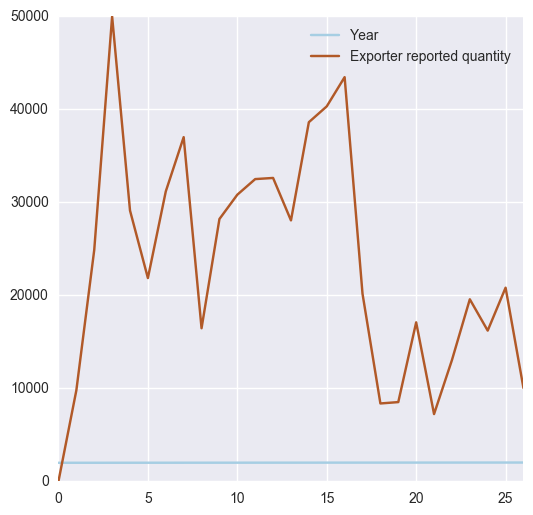

In [165]:
df_gp_total = df_greyparrot2.groupby(['Year'], as_index=False).sum()
df_gp_total.head()
df_gp_total.plot(figsize = (6,6), colormap =plt.get_cmap('Paired'))

In [89]:
df_greyparrot_top5 = df_greyparrot2[df_greyparrot2['Exporter'].isin(['GN', 'CI', 'CG', 'CD', 'CM'])]

In [242]:
df_greyparrot_groupby.head()

Exporter reported quantity
Year   Exporter                            
1990.0 CD                               4.0
       CG                               2.0
       CI                            1494.0
       CM                            1998.0
       GN                            5430.0

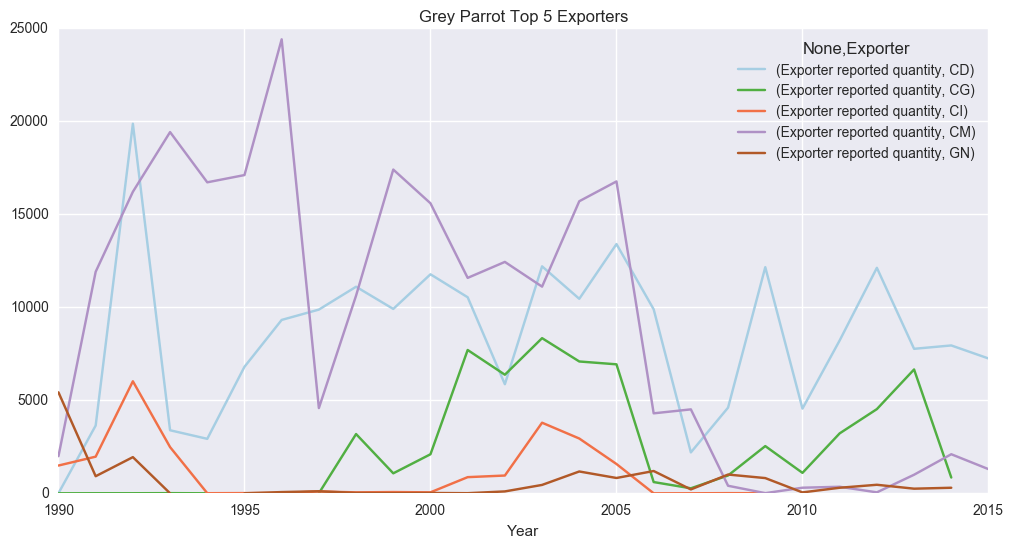

In [249]:
df_greyparrot_groupby = df_greyparrot_top5.groupby(['Year', 'Exporter']).sum()
df_greyparrot_groupby.unstack().plot(figsize = (12,6), colormap =plt.get_cmap('Paired'))
sns.plt.title('Grey Parrot Top 5 Exporters', fontsize=12)
plt.savefig('Top5 Exporters.png', dpi=500)

In [91]:
df_greyparrot_cd = df_greyparrot1[df_greyparrot1['Exporter']=='CD']

In [105]:
df_greyparrot_cd2= df_greyparrot_cd[['Year','Importer','Exporter reported quantity']]
df_greyparrot_cd2= df_greyparrot_cd2.dropna()

In [130]:
cd = df_greyparrot_cd2.groupby(['Year', 'Importer'],as_index=False).sum()
cd[['Year','Exporter reported quantity']] = cd[['Year','Exporter reported quantity']].astype(int)

In [131]:
cd_reduced = cd[cd['Importer'].isin(['CH','EG','CI','AM','RU','TG','KW','IT','MY','AE','CN','SN','BH','TR','PK','CZ','OM','RS','PT','HK','ES','DE','TH','FR','LB','SG','BE','ZA','NL'])]

In [132]:
cd_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 1 to 307
Data columns (total 3 columns):
Year                          229 non-null int64
Importer                      229 non-null object
Exporter reported quantity    229 non-null int64
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


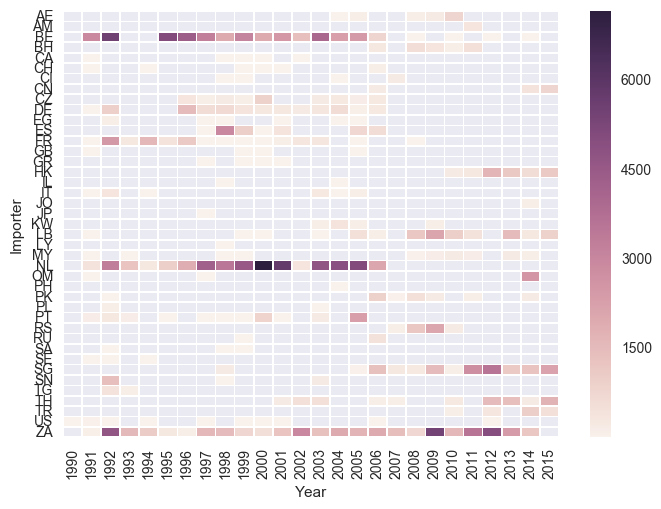

In [151]:
sns.set()
heat = cd_reduced.pivot("Importer", "Year", "Exporter reported quantity")
sns.heatmap(heat, linewidths=.5)

In [139]:
df_gp= df_greyparrot1[['Year','Importer','Exporter reported quantity']]
df_gp= df_gp.dropna()
df_gp = df_gp.groupby(['Year', 'Importer'],as_index=False).sum()
df_gp[['Year','Exporter reported quantity']] = df_gp[['Year','Exporter reported quantity']].astype(int)

In [253]:
df_gp.groupby(['Importer']).sum().sort('Exporter reported quantity').tail(20)

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Year,Exporter reported quantity
Importer,,
MX,40029,5166
RS,8034,6760
BH,20067,7229
CZ,32026,8006
LB,40094,8768
IT,42020,9126
TH,40085,10920
HK,42074,11606
AE,44069,12033


In [252]:
df_gp_ex= df_greyparrot1[['Year','Exporter','Exporter reported quantity']]
df_gp_ex.groupby(['Exporter']).sum().sort('Exporter reported quantity').tail(20)

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Year,Exporter reported quantity
Exporter,,
LB,34131.0,1046.0
CF,142164.0,1100.0
ES,164022.0,1172.0
AE,98119.0,1457.0
GQ,58034.0,1536.0
CZ,89993.0,1657.0
BE,269767.0,3546.0
ML,46235.0,4609.0
FR,421954.0,5495.0


In [155]:
df_gp_Other = df_gp[df_gp['Importer'].isin(['QA','SA','TW','UA','PH','CA','JP','KW','RU','IL','PK','MY','OM','CN','SN','MX','RS','BH','LB','TH','HK','AE','SG','TR','US','ZA'])]
df_gp_EU = df_gp[df_gp['Importer'].isin(['DE','CH','CY','BE','CZ','IT','GB','PT','FR','NL','ES'])]
            
#'SE','UZ','VE','BG','CI','CG','LY','IQ','ID','ZW','EG','GR','SK','AR','AM','TG','JO','PL','MT','AT','BR','MZ','HU',#

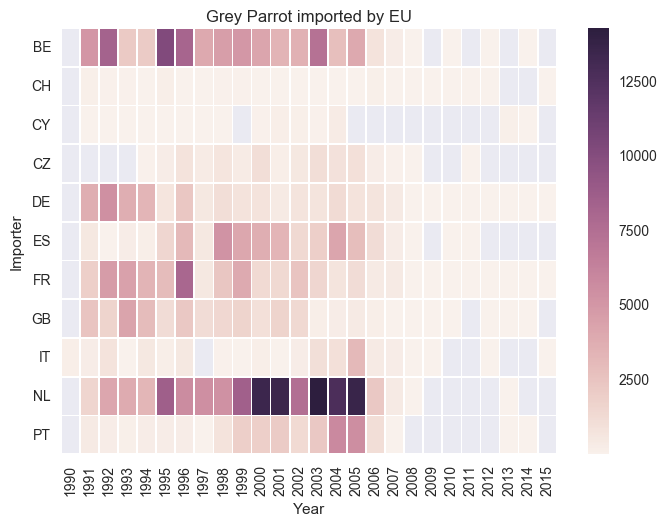

In [255]:
# change color 
sns.set()
heat1 = df_gp_EU.pivot("Importer", "Year", "Exporter reported quantity")
sns.heatmap(heat1, linewidths=.5)
plt.yticks(rotation=0)
sns.plt.title('Grey Parrot imported by EU', fontsize=12)
plt.savefig('Grey Parrot imported by EU.png', dpi=500)

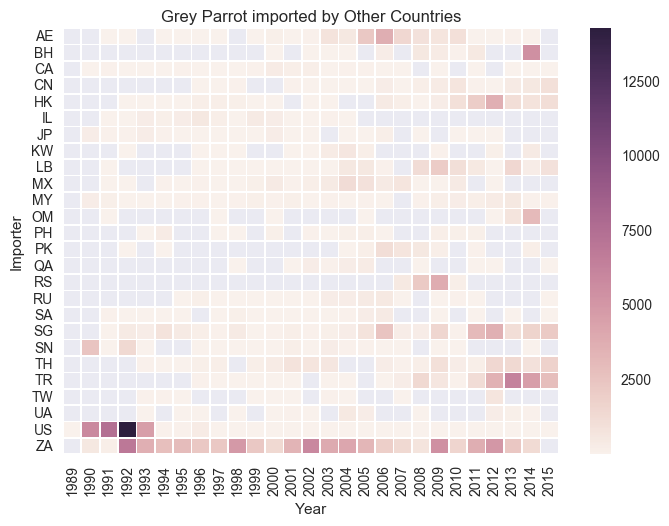

In [245]:
sns.set()
heat2 = df_gp_Other.pivot("Importer", "Year", "Exporter reported quantity")
sns.heatmap(heat2, linewidths=.5)
sns.plt.title('Grey Parrot imported by Other Countries', fontsize=12)
plt.savefig('Grey Parrot imported by Other Countries.png', dpi=500)

In [227]:
eu_list = ['DE','CH','CY','BE','CZ','IT','GB','PT','FR','NL','ES']
eu_dict = dict([(x, 'EU') for x in eu_list])
print eu_dict

{'BE': 'EU', 'FR': 'EU', 'CH': 'EU', 'NL': 'EU', 'PT': 'EU', 'DE': 'EU', 'IT': 'EU', 'CZ': 'EU', 'CY': 'EU', 'GB': 'EU', 'ES': 'EU'}


In [228]:
df_gp['Region'] = df_gp['Importer'].map(eu_dict)

In [230]:
df_gp = df_gp.fillna('Rest of World')

In [241]:
df_gp_groupby.head()

,Year,Region,Exporter reported quantity
0,1989,Rest of World,2
1,1990,EU,204
2,1990,Rest of World,9579
3,1991,EU,16447
4,1991,Rest of World,8429


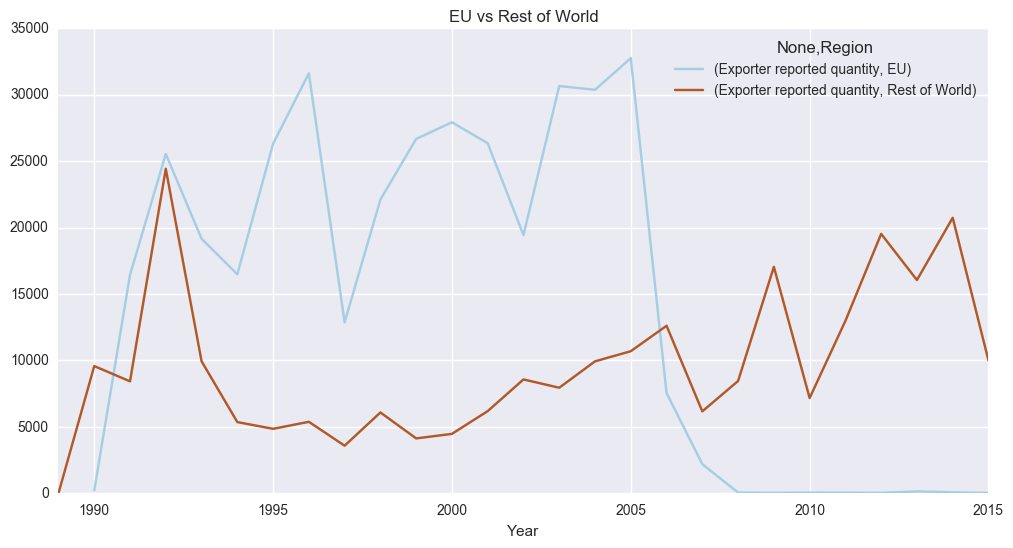

In [248]:
df_gp_groupby = df_gp.groupby(['Year','Region']).sum()
df_gp_groupby.unstack().plot(figsize = (12,6), colormap =plt.get_cmap('Paired'))
sns.plt.title('EU vs Rest of World', fontsize=12)
plt.savefig('EU vs Rest of World.png', dpi=500)

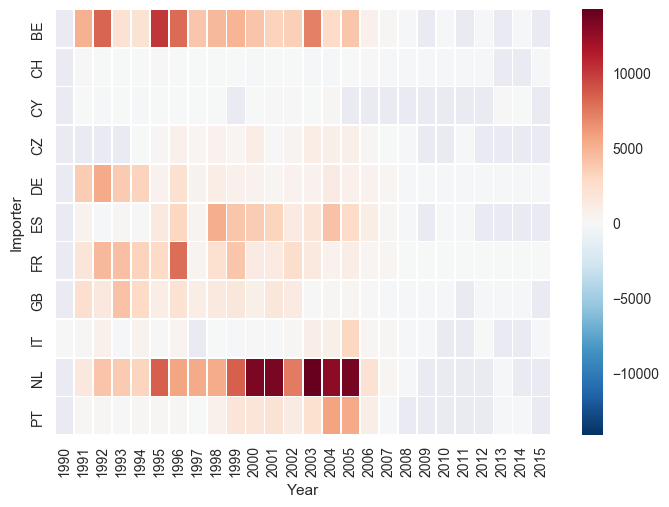

In [215]:
sns.set()
heat1 = df_gp_EU.pivot("Importer", "Year", "Exporter reported quantity")
sns.heatmap(heat1, linewidths=.5, center=heat1.loc['CH',2006], robust=False)

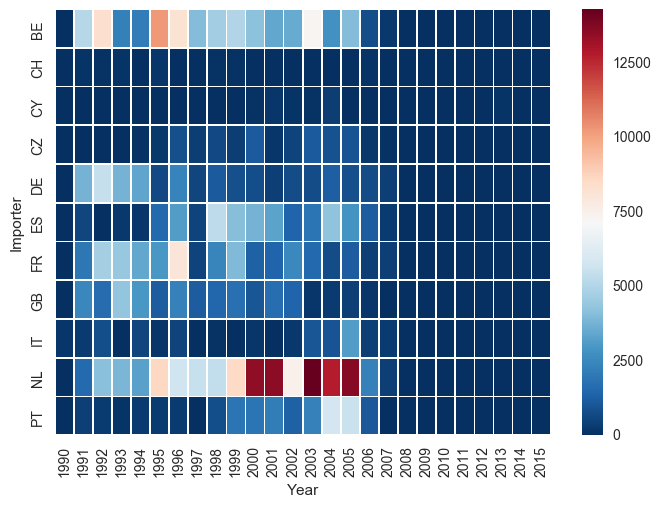

In [225]:
heat3 = heat1.fillna(0)
sns.heatmap(heat3, linewidths=.5, cmap="RdBu_r")

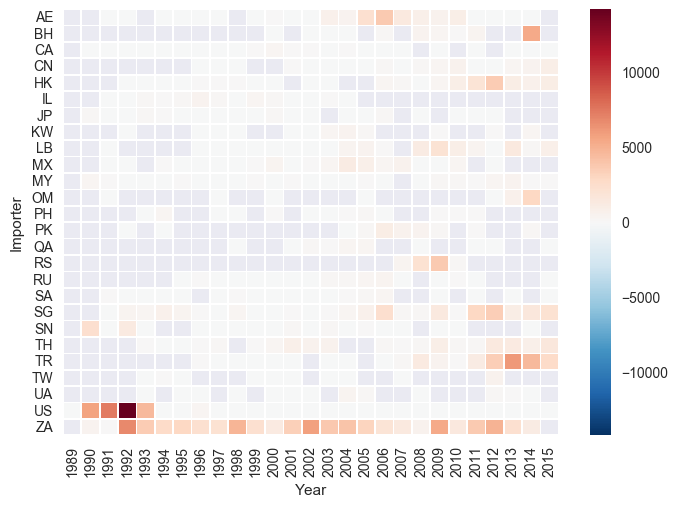

In [212]:
sns.set()
heat2 = df_gp_Other.pivot("Importer", "Year", "Exporter reported quantity")
sns.heatmap(heat2, linewidths=.5, center=heat2.loc['SN',2005])

In [192]:
df_elephant = df_new[df_new['Order']=='Proboscidea']

In [193]:
df_elephant = df_elephant[['Year','Taxon','Importer','Exporter','Importer reported quantity',\
                           'Exporter reported quantity','Term','Purpose','Source','Unit','Unnamed: 0']]
df_elephant.to_csv('elephant.csv')

In [188]:
df_elephant.groupby(['Importer'], as_index=False).count().sort('Unnamed: 0')

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Importer,Year,Taxon,Exporter,Importer reported quantity,Exporter reported quantity,Term,Purpose,Source,Unnamed: 0
82,GY,1,1,1,0,1,1,0,0,1
44,CS,1,1,1,0,1,1,1,1,1
186,TC,1,1,1,0,1,1,0,0,1
149,NU,1,1,1,0,1,1,1,1,1
200,UM,1,1,1,0,1,1,1,1,1
59,EH,1,1,1,0,1,1,1,0,1
19,BF,1,1,1,0,1,1,1,1,1
210,WS,1,1,1,0,1,1,1,0,1
15,BA,1,1,1,0,1,1,1,1,1
170,SB,1,1,1,0,1,1,0,0,1


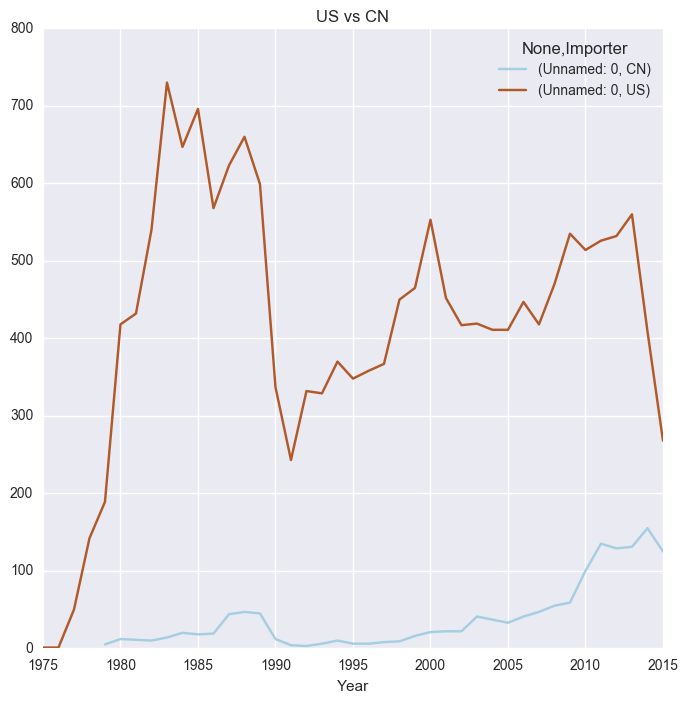

In [184]:
df_CNUS = df_elephant[df_elephant['Importer'].isin(['US','CN'])]
df_CNUS_trade = df_CNUS[['Year','Importer','Unnamed: 0']]

df_CNUS_group = df_CNUS_trade.groupby(['Year', 'Importer']).count()
df_CNUS_group.unstack().plot(figsize = (8,8), colormap =plt.get_cmap('Paired'))
sns.plt.title('US vs CN', fontsize=12)
# plt.savefig('US vs CN.png', dpi=1000)

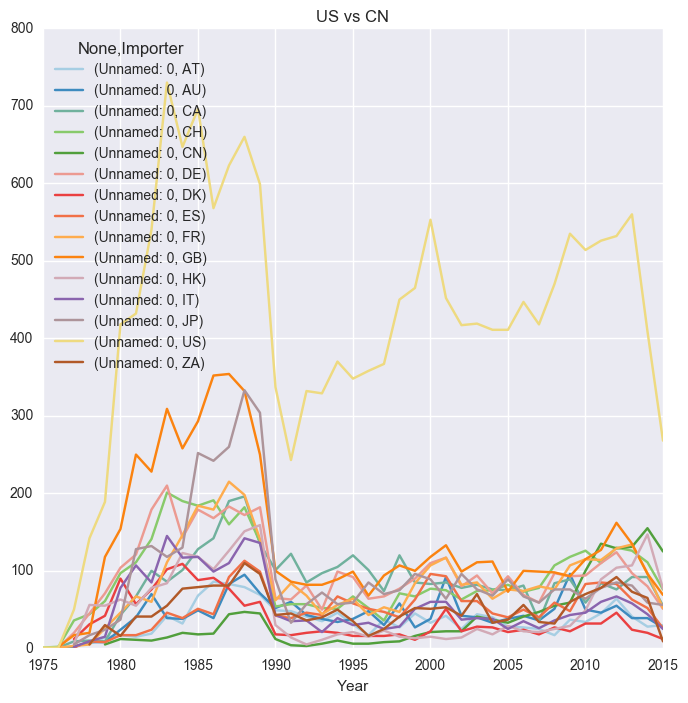

In [189]:
df_top15 = df_elephant[df_elephant['Importer'].isin(['US','CN','GB','DE','JP','CH','FR','CA','IT','HK','ES','ZA','AU','DK','AT'])]
df_top15_trade = df_top15[['Year','Importer','Unnamed: 0']]

df_top15_group = df_top15_trade.groupby(['Year', 'Importer']).count()
df_top15_group.unstack().plot(figsize = (8,8), colormap =plt.get_cmap('Paired'))
sns.plt.title('US vs CN', fontsize=12)